<a href="https://colab.research.google.com/github/Ater97/DeepLearningKeras/blob/master/CreateCirclesAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#deep-circles.py

#Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

#Helper functions

# plot the data on a figure
def plot_data(pl,X,y):
  #plot class where y==0
  pl.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
  #plot class where y==1
  pl.plot(X[y==1,0], X[y==1,1], 'xr', alpha=0.5)
  pl.legend(['0', '1'])
  return pl

# common function that draws thw decision boundaries
def plot_decision_boundary(model, X, y):
  amin,bmin = X.min(axis=0) - 0.1
  amax,bmax = X.max(axis=0) + 0.1
  hticks = np.linspace(amin,amax,101)
  vticks = np.linspace(bmin,bmax,101)
  
  aa,bb = np.meshgrid(hticks, vticks)
  ab = np.c_[aa.ravel(), bb.ravel()]
  
  # make prediction with the model and reshape the output so contours can plot it
  c = model.predict(ab)
  Z = c.reshape(aa.shape)
  
  plt.figure(figsize=(12, 8))
  # plot the contour
  plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
  # plot the moons of data
  plot_data(plt, X, y)
  
  return plt



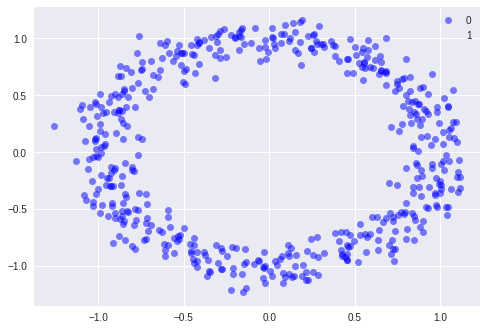

In [4]:

X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Outpu_Layer (Dense)          (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
300/300 [==============================] - 0s 308us/sample - loss: 0.1430 - acc: 0.9467


Test loss: 0.14300392922014 Test accurary: 0.94666666


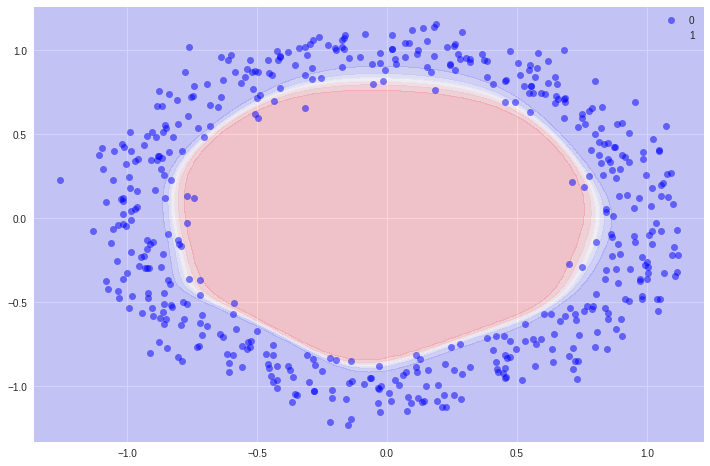

In [12]:
# split the data into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Create the keras model
#from keras import backend as kbe
#from keras.model import Sequential
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Implement as Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inputs = Input(shape=(2,))
# Hidden layers
x = Dense(4, activation="tanh", name="Hidden-1")(inputs)
x = Dense(4, activation="tanh", name="Hidden-2")(x)
# Output Layer
o = Dense(1, activation="sigmoid", name="Outpu_Layer")(x)
# Create Model and Specify the input and output
model = Model(inputs=inputs, outputs=o)
# Display summary

model.summary()
#compile the model minimize corssentopy for a binary. macimize for accuracy
model.compile(Adam(lr=0.05),'binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode=max)]


#Fit the model with the data from make_blobs, make 100 cycles through the data
model.fit(X_train, y_train, epochs=100, verbose=0)
#get loss and acurracy on test data
eval_result = model.evaluate(X_test, y_test)

print("\n\nTest loss:", eval_result[0], "Test accurary:", eval_result[1])

#plot the decision boundary
plot_decision_boundary(model, X, y).show()



# >= size of input layer AND <= size of output layer
# (2/3 * size of input layer) + size of output layer
# <2 * size of input layer